# Econométrie - projet

SES722<br />
11/04/2020<br />
Sonia BOUDEN & Xavier BRACQUART<br />

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from matplotlib import cm
from pandas.plotting import scatter_matrix, autocorrelation_plot
from mpl_toolkits.mplot3d import axes3d, Axes3D

import scipy.stats as stat
from scipy.stats import pearsonr
from scipy.stats import norm as norm
from scipy import stats
from scipy.stats import t
from scipy.stats import f

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from sklearn.linear_model import LinearRegression

# Partie 1. Régression

## Question 1

>Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [4]:
data = pd.read_csv('MROZ.raw', delim_whitespace=True, header=None, skiprows=1, na_values=".")

columns =  ["inlf","hours","kidslt6","kidsge6","age","educ","wage","repwage","hushrs","husage","huseduc","huswage","faminc","mtr","motheduc",
"fatheduc","unem","city","exper","nwifeinc","lwage","expersq"]  

df = data.rename(columns={i : columns[i] for i in range(len(columns))})
df.head(2)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.49998,0.328512,25
1,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.03991,1.514138,225


In [5]:
#df['wage'] = pd.to_numeric(df['wage'], errors='coerce')

In [6]:
df = df[df.wage>0]
df.head(2)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.49998,0.328512,25
1,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.03991,1.514138,225


## Question 2

>Faire les statistiques descriptives du salaire, de l’âge et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieur au 65ème percentile de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon. Commenter.

#### Statistiques pour l'ensemble des femmes

In [7]:
df[['wage','age','educ']].describe()

,wage,age,educ
count,427.000000,427.000000,427.000000
mean,4.179611,41.995316,12.660422
std,3.313925,7.714992,2.287833
min,0.128200,30.000000,5.000000
25%,2.258400,35.000000,12.000000
50%,3.491600,42.000000,12.000000
75%,4.972600,47.500000,14.000000
max,25.000000,60.000000,17.000000


Le salaire moyen des femmes dans la base de données est de 4.179. L'âge moyen est 42 ans. Le nombre d'années d'éducation moyen est de 12.7 années.

#### Statistiques pour les femmes dont le salaire du mari est supérieur au 65ème percentile de l'échantillon

In [8]:
msq = df.huswage.quantile(0.65)

In [9]:
df1 = df[df['huswage']>msq]
df1.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.49998,0.328512,25
3,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.10006,1.524272,49
9,1,1969,0,1,33,12,4.0630,4.30,2450,34,...,32300,0.5815,12,3,5.0,0,15,24.29995,1.401922,225
10,1,1960,0,1,42,11,4.5918,4.58,2375,47,...,28700,0.6215,14,7,5.0,0,14,19.70007,1.524272,196
13,1,1848,0,1,43,10,3.6797,3.38,2024,45,...,31431,0.5815,7,7,7.5,1,6,24.63091,1.302831,36


In [10]:
msq65 = df['huswage'] > msq
df[msq65][['wage', 'age', 'educ']].describe()

,wage,age,educ
count,148.000000,148.00000,148.000000
mean,5.139315,42.52027,13.520270
std,4.351728,7.35168,2.345845
min,0.213700,30.00000,5.000000
25%,2.561925,36.00000,12.000000
50%,4.008050,43.00000,13.000000
75%,6.516300,48.00000,16.000000
max,25.000000,59.00000,17.000000


Le salaire moyen des femmes dont le salaire du mari est supérieur au 65ème percentile de l'échantillon est de 5.139. L'âge moyen est de 42.5 ans, et le nombre d'années d'éducation moyen est de 13.5 années.

(Quand un résultat est affiché en percentile 65, cela ne veut pas dire que ce résultat correspond exactement à la valeur unique du percentile 65, mais à la classe de résultats situés en dessous de la valeur du percentile 65 et au-dessus de la valeur du percentile 50 qui dans notre cas représenterait la médiane)

#### Statistiques pour les femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon

In [11]:
msq65 = df['huswage'] < msq
df[msq65][['wage', 'age', 'educ']].describe()

,wage,age,educ
count,275.000000,275.000000,275.000000
mean,3.655086,41.618182,12.221818
std,2.475750,7.903826,2.130307
min,0.128200,30.000000,6.000000
25%,2.135300,35.000000,12.000000
50%,3.166600,41.000000,12.000000
75%,4.517550,47.000000,12.500000
max,22.500000,60.000000,17.000000


Le salaire moyen des femmes dont salaire du mari est inférieur au 65ème percentile de l’échantillon est de 3.655086.

On observe que les femmes agées en moyenne de 42.5 ans dont le salaire du mari est supérieur au 65ème percentile, et ayant effectué plus de 13.5 ans d'études, gagnent plus que l'ensemble des femmes en moyenne ayant à peu près le même age moyen (42 ans) et quasiment le même nombre d'années d'études (12.66 années) et plus que les femmes dont le mari gagne moins que le 65ème percentile de l'échantillon. 
L'écart-type est plus élevé aussi pour les femmes dont le mari gagne plus que la médiane (testée et trouvée pour le percentile 0.50).

On peut chercher à savoir s'il y a une relation entre le salaire des femmes, leur âge et leur nombre d'années d'études.

## Question 3

> Faire l'histogramme de la variable wage. Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme.

##### Histogramme normé

/home/xavier/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0.5, 1.0, 'Histogramme de la variable wage')

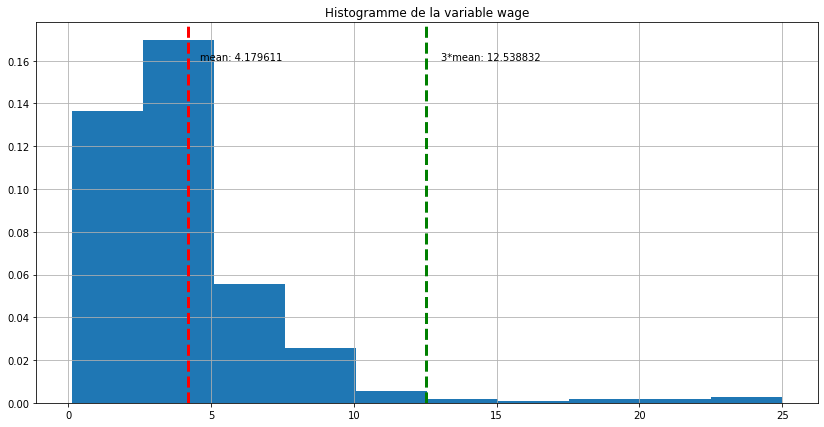

In [12]:
plt.figure(figsize=(14, 7))
df.wage.hist(normed=True)
plt.axvline(df.wage.mean(), color='r', linestyle='dashed', linewidth=3)
plt.axvline(df.wage.mean()*3, color='g', linestyle='dashed', linewidth=3)

min_ylim, max_ylim = plt.ylim()
plt.text(df.wage.mean()*1.1, max_ylim*0.9, 'mean: {:.6f}'.format(df.wage.mean()))
plt.text(3*df.wage.mean()*1.04, max_ylim*0.9, '3*mean: {:.6f}'.format(df.wage.mean()*3))

plt.title("Histogramme de la variable wage")

##### Histogramme non normé

Text(0.5, 1.0, 'Histogramme de la variable wage')

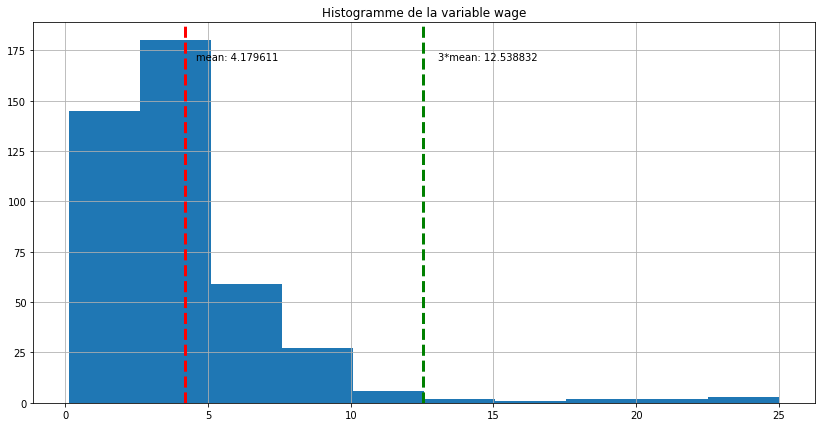

In [13]:
plt.figure(figsize=(14, 7))
df.wage.hist()
plt.axvline(df.wage.mean(), color='r', linestyle='dashed', linewidth=3)
plt.axvline(df.wage.mean()*3, color='g', linestyle='dashed', linewidth=3)

min_ylim, max_ylim = plt.ylim()
plt.text(df.wage.mean()*1.1, max_ylim*0.9, 'mean: {:.6f}'.format(df.wage.mean()))
plt.text(3*df.wage.mean()*1.04, max_ylim*0.9, '3*mean: {:.6f}'.format(df.wage.mean()*3))

plt.title("Histogramme de la variable wage")

In [14]:
# Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme
# sig2=u.T@u/(n-k)
# Var=sig2*np.linalg.inv(X.T @ X)
# std=np.sqrt(np.diag(Var))
# s=(np.abs(df.wage)<3*np.sqrt(sig2))
# u1=df[s]
# plt.hist(u1,’auto’)

On supprime les observations qui sont à plus de 3 écart-types de la moyenne.

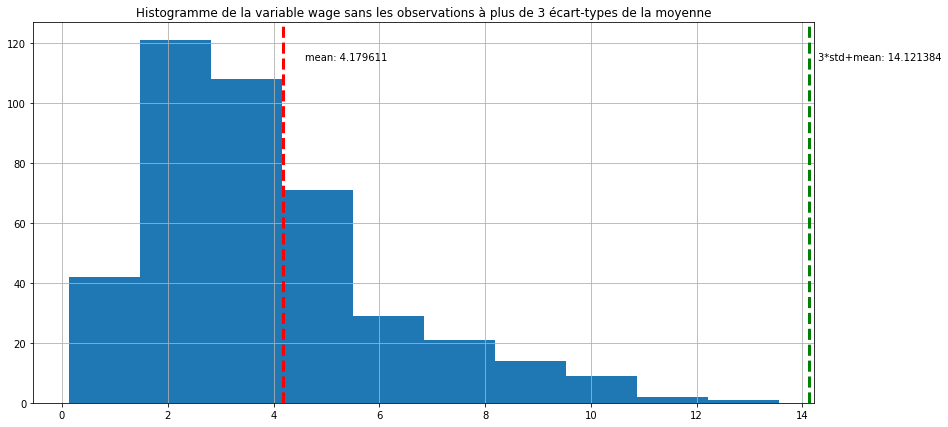

In [15]:
plt.figure(figsize=(14, 7))
filtre = df.wage> 3*df.wage.std() + df.wage.mean()
df[~filtre].wage.hist()

min_ylim, max_ylim = plt.ylim()
plt.axvline(df.wage.mean(), color='r', linestyle='dashed', linewidth=3)
plt.axvline(3*df.wage.std() + df.wage.mean(), color='g', linestyle='dashed', linewidth=3)
plt.text(df.wage.mean()*1.1, max_ylim*0.9, 'mean: {:.6f}'.format(df.wage.mean()))
plt.text(3*df.wage.std() + df.wage.mean()*1.04, max_ylim*0.9, '3*std+mean: {:.6f}'.format(3*df.wage.std() + df.wage.mean()))

plt.title("Histogramme de la variable wage sans les observations à plus de 3 écart-types de la moyenne")
plt.show()

## Question 4

> Calculer les corrélations motheduc et fatheduc. Expliquer le problème de multi-collinéarité.Commenter.

In [16]:
corr_motheduc_fatheduc = df[['motheduc', 'fatheduc']].corr()
corr_motheduc_fatheduc

,motheduc,fatheduc
motheduc,1.000000,0.555633
fatheduc,0.555633,1.000000


In [17]:
print('Corrélation motheduc et fatheduc: ', np.round(pearsonr(df.motheduc,df.fatheduc)[0], 6))

Corrélation motheduc et fatheduc:  0.555633


In [18]:
print('corrélation : ', np.corrcoef(df['motheduc'],df['fatheduc']))

corrélation :  [[1.         0.55563305]
 [0.55563305 1.        ]]


La corrélation est de 55.6% entre l'éducation de la mère et celle du père. Ceci peut être dû au fait que 2 conjoints sont souvent issus de la même classe sociale et ont suivi des parcours semblables (en terme du nombre d'années d'études ou de carrière).

On ne doit pas confondre ici multicollinéarité et corrélation. Si des variables colinéaires sont de facto fortement corrélées entre elles, deux variables corrélées ne sont pas forcément colinéaires. On dit que les variables sont colinéaires lorsque celles ci mesurent la même chose.

Avec la valeur de corrélation obtenue, on ne peut pas conclure sur la multi-collinéarité des variables.

Le problème de multicolinéarité:
Il y a des colonnes de X quasi linéairement dépendantes. Le det(X'X) est donc quasi nul. On ne peut donc pas calculer son inverse pour pouvoir calculer les écarts types.

On trouve une corrélation non nulle entre ces deux variables. Cependant la corrélation est loin de 1, ce qui montre que ces variables ne sont pas colinéaires. On n'aura donc pas de problème de multicolinéarité en utilisant ces deux variables comme variables explicatives.

On rejette l'hypothèse nulle (pas de correlation) au seuil de 5%. La corrélation entre les deux variables peut introduire un biais de multicollinéarité.

## Question 5

> Faites un graphique en nuage de points entre wage et educ. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

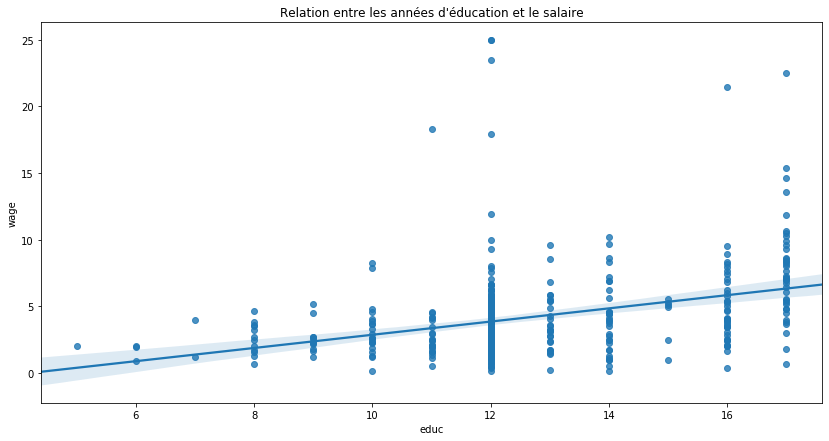

In [19]:
plt.figure(figsize=(14, 7))
plt.title("Relation entre les années d'éducation et le salaire")
sns.regplot(df.educ, df.wage, fit_reg=True)
plt.show()

Le salaire moyen des femmes met en jeu plusieurs variables (facteurs) en cause. Le niveau d'éducation en est un facteur sans doute important mais ce n'est pas la seule variable à prendre en considération.
Il faudrait que toutes les autres variables soient constantes pour déterminer si le niveau d'études est vraiment le seul facteur influant sur le salaire des femmes.
A ce niveau, on peut juste constater qu'il y a une variance importante pour le nombre d'années d'études: 12, 16,17 années, par exemple comparé à d'autres nombres d'années où on a une tendance linéaire (5,6,7 ans d'années d'études)

## Question 6

> Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.

Nous traitons un modèle où les erreurs ont une espérance nulle et sont non corrélées et dont les variances sont égales.

Le théorème de Gauss–Markov se base sur des hypothèses sur l'espérance et la matrice de variance-covariance des aléas $ \epsilon $ :

- $ \mathbb{E}(\epsilon)=0 $ (absence de corrélation entre la perturbation et les variables explicatives) 
- $ Var(\epsilon_i)= \sigma² $ ou matriciellement: $ Var(\epsilon_i)= \sigma²I_n $
c'est-à-dire que toutes les erreurs ont la même variance : on parle d'homoscédasticité et 
- $ Cov(\epsilon_i,\epsilon_j)= 0 $


Le théorème de Gauss-Markov sur le modèle linéaire, garantit que l’estimateur par moindre carré est BLUE (best linear unbiased estimator).

Le biais d'une variable omise se produit lorsqu'une des variables explicatives corrélée à la fois avec la variable expliquée et avec le terme d'erreur n'est pas prise en compte. Ce biais résulte du modèle attribuant l'effet des variables manquantes aux effets estimés des variables incluses.

## Question 7

> Faire la régression du log de wage en utilisant comme variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

In [20]:
X = df[["city","educ","exper","nwifeinc","kidslt6","kidsge6"]].values
y = df["lwage"]
reg = LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.1556569770017887

In [21]:
n, k = X.shape
print("n, k : {}, {}".format(n, k))

n, k : 427, 6


In [22]:
residus = y - reg.predict(X)
gauss_residus = norm.rvs(np.mean(residus), np.std(residus), size=5000)

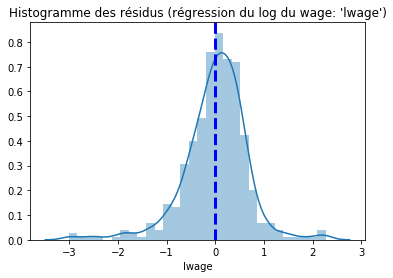

In [23]:
plt.title("Histogramme des résidus (régression du log du wage: 'lwage')")
sns.distplot(residus, bins=30, label='Residuals histogram')

#residus.hist(bins = 30)
plt.axvline(np.mean(residus), color='b', linestyle='dashed', linewidth=3)
#plt.text(np.mean(residus), max_ylim, 'mean: {:.3f}'.format(np.mean(residus)))

plt.show()

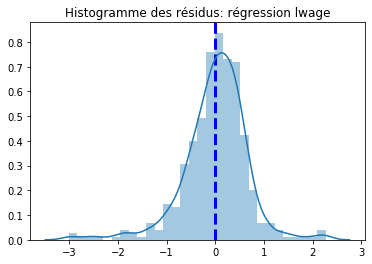

In [24]:
model = sm.OLS(y, sm.add_constant(X)).fit()  # y: dependent variable, add_constant(X): intercept, OLS linear model (Ordinary Least Squares).
lresiduals = model.resid
plt.title("Histogramme des résidus: régression lwage")
plt.axvline(np.mean(residus), color='b', linestyle='dashed', linewidth=3)
sns.distplot(lresiduals, bins=30, label='Residuals histogram')

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.90
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.11e-13
Time:                        15:19:45   Log-Likelihood:                -431.38
No. Observations:                 427   AIC:                             876.8
Df Residuals:                     420   BIC:                             905.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4013      0.208     -1.934      0.0

L'histogramme des résidus est centré et symétrique par rapport à 0.

## Question 8

> Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

nwifeinc : (faminc - wage*hours)/1000 (faminc: family income)

Nous pouvons voir depuis le summary que la p-value concernant le test de significativité du coefficient de nwifeinc pour x4 vaut 0.143.  
H0: $\beta_{nwifeinc}$ = 0
- Au seuil de 1%: 0.01 < 0.143: On ne rejette pas l'hypothèse H0 
- Au seuil de 5%: 0.05 < 0.143: On ne rejette pas l'hypothèse H0  
- Au seuil de 10%: 0.1 < 0.143: On ne rejette pas l'hypothèse H0  

Pour les 3 seuils proposés, nous ne pouvons rejeter l'hypothèse de non significativité de $\beta_{nwifeinc}$.  

L'histogramme montre une loi normale qui suppose qu'on est dans le cas d'un test paramétrique. On utilisera le test de Student (qui est un exemple de test paramétrique).

Le principe général des tests d'hypothèse repose sur la formulation d'une 

- hypothèse nulle  H_0 : $ \beta_{nwifeinc} = 0 $ : que l'on cherche à rejeter au profit de :
- l'hypothèse alternative $ H_1 : \beta_{nwifeinc} ≠ 0 $


On calcule la stat de test suivante : 

$ t_{nwifeinc} = \frac { \hat{\beta}_{nwifeinc}} {\hat{\sigma}_{nwifeinc}} $

In [26]:
t_nwifeinc = 1.466  #depuis le summary
Beta = reg.coef_[3]
print("le coefficient de regression associé à nwifeinc est {}".format(Beta))
print("la valeur t_nwifeinc: ", t_nwifeinc)
print('la p-valeur est: ',t.sf(t_nwifeinc,n-k)*2)

le coefficient de regression associé à nwifeinc est 0.004889128168954648
la valeur t_nwifeinc:  1.466
la p-valeur est:  0.14339476993691103


On vérifie bien que la p-valeur est celle retrouvée sur le summary.
Vérifions que nous retrouvons bien les mes valeurs par le calcul de la t student, le même coeff et std.

x4:            coef= 0.0049,     std= 0.003,      t= 1.466,     p-val= 0.143     

In [27]:
X = df[["city","educ","exper","nwifeinc","kidslt6","kidsge6"]].values
y = df["lwage"]

n,k = X.shape
results = sm.OLS(y, sm.add_constant(X)).fit()
residus = results.resid

sig2 = residus.T.dot(residus) / (n-k)
print("sig2:", sig2)

inv_gram = np.linalg.inv(X.T.dot(X))
std = np.sqrt(np.diag(sig2 * inv_gram))
beta = inv_gram.dot(X.T).dot(df['lwage'])

print("std: ",std)
print("beta: ",beta)
t_nwfeinc = beta[3] / std[3]

print("t_nwifeinc : ", t_nwifeinc)

p_val = 2 * (1- t.cdf(t_nwifeinc,n-k)) # *2 car il s'agit d'un test alternatif des 2 côtés
print("p_val : ", p_val)

sig2: 0.44789700585066605
std:  [0.07008285 0.00847451 0.00413382 0.00332472 0.08583124 0.02494099]
beta:  [ 0.02524795  0.07811527  0.01211034  0.00450532 -0.04444561 -0.03130184]
t_nwifeinc :  1.466
p_val :  0.14339476993691092


L’erreur/risque de première espèce (α) est également appelée seuil de signification du test statistique. 
Elle consiste à conclure à tort que la variable nwifeinc est la plus importante quant au calcul du salaire moyen des femmes alors que le hasard est responsable des différences observées.

L'erreur bêta ($\beta$) (ou risque de deuxième espèce) mesure cette probabilité de ne pas rejeter l’hypothèse nulle H0 alors qu’elle est fausse.

In [28]:
for threshold in [1, 5, 10]:
    print('Seuil: {}%'.format(threshold))
    print('p_value de t_nwifeinc : ', p_val)
    if (p_val < threshold/100):
        print('{:.2f} < {:.2f}: On rejette l\'hypothèse de non-significativité'
              .format(p_val, threshold/100), '\n')
    else:
        print('{:.2f} > {:.2f}: On ne rejette pas l\'hypothèse de non-significativité'
              .format(p_val, threshold/100), '\n')

Seuil: 1%
p_value de t_nwifeinc :  0.14339476993691092
0.14 > 0.01: On ne rejette pas l'hypothèse de non-significativité 

Seuil: 5%
p_value de t_nwifeinc :  0.14339476993691092
0.14 > 0.05: On ne rejette pas l'hypothèse de non-significativité 

Seuil: 10%
p_value de t_nwifeinc :  0.14339476993691092
0.14 > 0.10: On ne rejette pas l'hypothèse de non-significativité 



## Question 9

> Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)

On teste désormais : $ t_{nwifeinc} = \frac { \hat{\beta}_{nwifeinc}- 0.01} {\hat{\sigma}_{nwifeinc}} $

In [29]:
t_nwifeinc = (Beta - 0.01) / std[3]

threshold = 5  # seuil significativité 5%
t_stat = 2 * t.isf(threshold/100, n-k)
p_val = 2 * (t.cdf(t_nwifeinc, n-k))  # notre t stat est négatif

print('T-stat : ', t_nwifeinc)
print('Seuil: {}%'.format(threshold))
print('p-value : {}'.format(p_val))

if (p_val < threshold/100):
    print('{:.2f} < {:.2f}: On rejette l\'hypothèse de non-significativité'
        .format(p_val, threshold/100), '\n')
else:
    print('{:.2f} > {:.2f}: On ne rejette pas l\'hypothèse de non-significativité'
        .format(p_val, threshold/100), '\n')

T-stat :  -1.537235226620244
Seuil: 5%
p-value : 0.12498691508296927
0.12 > 0.05: On ne rejette pas l'hypothèse de non-significativité 



On ne rejette pas l'hypothèse de non significativité que $\beta_{nwifeinc}$ = 0.01 

## Question 10

> Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.

In [30]:
Beta_nwifeinc = reg.coef_[3]
print("le coefficient de regression associé à nwifeinc est {}".format(Beta_nwifeinc))
Beta_city = reg.coef_[0]
print("le coefficient de regression associé à city est {}".format(Beta_city))

le coefficient de regression associé à nwifeinc est 0.004889128168954648
le coefficient de regression associé à city est 0.036332885165569616


Pour réaliser un test d'hypothèses jointes de nwifeinc égal à 0.01 et celui de city égal à 0.05 , on estime une statistique de test de Fisher entre le modèle contraint et le modèle non-contrait selon les hypothèses :

$ H_0 : \beta_{nwifeinc} = 0.01, \beta_{city} = 0.05 $

On calcule la somme des carrés des erreurs du modèle contraint. Le modèle contraint impose les contraintes de H0. On calculera la statistique de Fisher:
$ F_{nwifeinc + city} = \frac { (SSR_{contr} - SSR_{nncontr}) /2 } {SSR_{nncontr}/(n-k) } $  

On compare ensuite cette statistique de test à la valeur critique.

On définit la SSR comme la Somme des résidus au carré. On estime donc deux modèles, un modèle non-contraint, et un modèle contraint.

$ F_{nwifeinc + city} = \frac { SSR_{contr} - SSR_{nncontr} } {ddl_{contr} - ddl_{nncontr} } \times \frac {ddl_{nncontr}} {SSR_{nncontr}} $  

In [31]:
# Modèle non contraint
ols = sm.OLS(y, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = df.shape[0] - X.shape[1] - 1

# Modèle contraint: le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.
Yc = y - 0.01 * df.nwifeinc - 0.05 * df.city
Xc = df[["educ","exper","kidslt6","kidsge6"]]

ols = sm.OLS(Yc, sm.add_constant(Xc)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df.shape[0] - Xc.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1- f.cdf(F, ddl_c - ddl_n, ddl_n)

print("La F-statistic: {}".format(F))
print("La p_value est de : {}".format(p_val))

La F-statistic: 1.3211156768069399
La p_value est de : 0.2679439569022454


Au seuil de 5%: 0.05 < 0.26: On ne rejette pas l'hypothèse H0

##  Question 11

> Tester l’hypothèse jointe que $\beta_{nwifeinc}+\beta_{city}=0.1$ et $\beta_{educ}+\beta_{exper}=0.1 $

H0: $\beta_{nwifeinc} + \beta_{city} = 0.1 Alors \beta_{nwifeinc} = 0.1 - \beta_{city}$  
et $\beta_{educ} + \beta_{exper} = 0.1 Alors \beta_{educ} = 0.1 - \beta_{exper}$

In [32]:
# Modèle non contraint
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
y = df['lwage']

ols = sm.OLS(y, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
n,k=np.shape(sm.add_constant(X))

# Modèle contraint
y = df['lwage'] - 0.1*df['nwifeinc'] - 0.1*df['educ']
df['nwicity'] = df['nwifeinc'] - df['city']
df['eduexper'] = df['educ'] - df['exper']

X = df[['nwicity','eduexper','kidslt6', 'kidsge6']]

ols = sm.OLS(y, sm.add_constant(X)).fit()
SSR_c = np.sum(ols.resid ** 2)

# Stat de test
F = ((SSR_c - SSR_n)/ 2) / (SSR_n / (n-k))
p_val = 1- stats.f.cdf(F, 2, n-k)

print("f_stat :", F)
print("p_value : ",p_val)

f_stat : 0.9138430034859418
p_value :  0.40177606481489325


## Question 12

> Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez

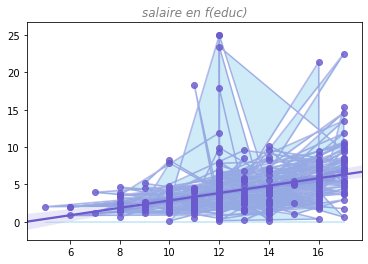

In [33]:
x=df.educ.values
y=df.wage.values
plt.fill_between( x, y, color="skyblue", alpha=0.4)
plt.plot(x, y, color="Slateblue", alpha=0.4)
plt.title('salaire en f(educ)', fontsize=12, color='grey', style='italic')
sns.regplot(x, y, color= 'Slateblue', fit_reg=True)
plt.show()

En traçant la droite de régression, on remarque bien que le salaire augmente en fonction du nombre d'années d'éducation.

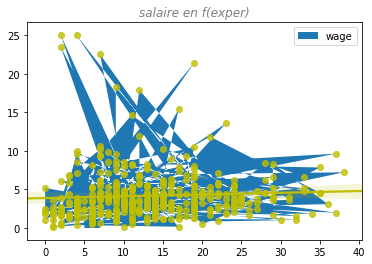

In [34]:
x=df.exper.values
y=df.wage.values

plt.stackplot(x,y, labels=['wage'])
plt.legend(loc='upper right')
plt.title('salaire en f(exper)', fontsize=12, color='grey', style='italic')
sns.regplot(x, y, color= 'y', fit_reg=True)

plt.show()

Le salaire augmente très légèrement en fonction de l'expérience.

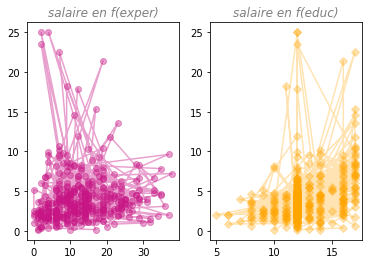

In [35]:
plt.title("Variation du salaire en f(educ,exper)")
plt.subplot(121)
plt.plot( df.exper.values, df.wage.values, marker='o',color='mediumvioletred' , alpha=0.4)

plt.title('salaire en f(exper)', fontsize=12, color='grey', style='italic')

 
plt.subplot(122)
plt.plot( df.educ.values, df.wage.values, marker='D', color="orange", alpha=0.3)
plt.title('salaire en f(educ)', fontsize=12, color='grey', style='italic')
plt.show()

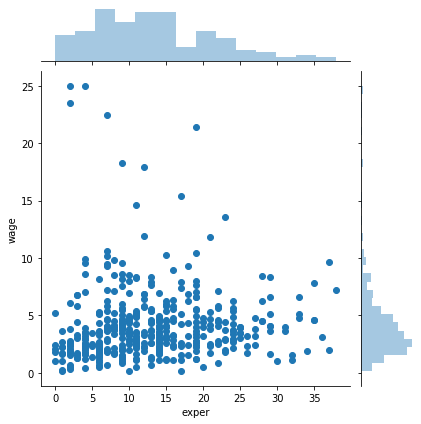

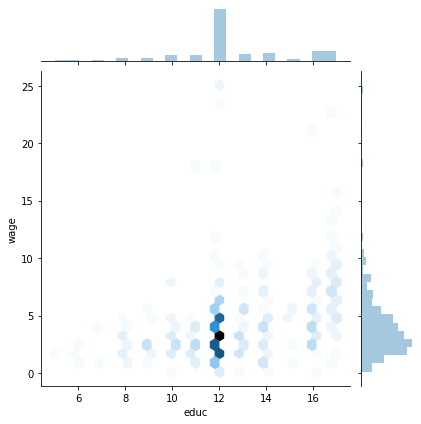

In [36]:
sns.jointplot(x=df.exper, y=df.wage, kind='scatter')
sns.jointplot(x=df.educ, y=df.wage, kind='hex')

On remarque que le salaire augmente en fonction du nombre d'années d'étude (un pic pour 12 ans d'études. Sur le dernier graphe on observe bien une gaussienne pour 12.

Text(0.5, 0, 'wage')

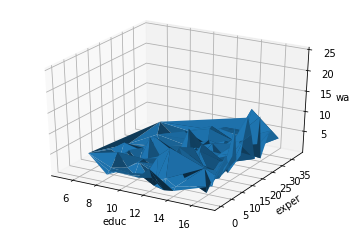

In [37]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(df.educ, df.exper, df.wage)
ax.set_xlabel('educ')
ax.set_ylabel('exper')
ax.set_zlabel('wage')

## Question 13

> Tester l’égalité des coefficients associés aux variables kidsge6 et kidslt6. Interprétez.

In [38]:
X1 = df[["city","educ","exper","nwifeinc","kidslt6","kidsge6"]].values 
Y1 = df['lwage']

ols = sm.OLS(Y1, sm.add_constant(X1)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = df.shape[0] - X1.shape[1] - 1

# Modèle contraint
df['kids'] = df['kidslt6'] + df['kidsge6']
Y2 = df['lwage']
X2 = df[['city','educ','exper','nwifeinc', 'kids']]

ols = sm.OLS(Y2, sm.add_constant(X2)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df.shape[0] - X2.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1- f.cdf(F, ddl_c - ddl_n, ddl_n)

print(p_val)

0.6908219743962195


On ne rejette pas l'hypothèse d'égalité des coefficients car la p-value est de 0.7 et est supérieure à 5%.

## Question 14

> Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7.


On commence par calculer avec wage et ensuite on passe au log pour vérifier si on améliore notre modèle.

In [39]:
X = df[["city","educ","exper","nwifeinc","kidslt6","kidsge6"]].values 
Y = df['wage']

results = sm.OLS(Y, sm.add_constant(X)).fit()
u2 = results.resid ** 2

In [40]:
# Modèle non contraint
ols = sm.OLS(u2, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = X.shape[0] - X.shape[1] - 1

# Modèle contraint
X = np.ones((df.shape[0], 1))

ols_2 = sm.OLS(u2, X).fit()
SSR_c = np.sum(ols_2.resid ** 2)
ddl_c = X.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1 - f.cdf(F, ddl_c - ddl_n, ddl_n)

print(ols.summary())
print("F-statistic: ",F)
print("p-value: ",p_val)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.589
Date:                Sat, 11 Apr 2020   Prob (F-statistic):              0.149
Time:                        15:19:49   Log-Likelihood:                -2202.6
No. Observations:                 427   AIC:                             4419.
Df Residuals:                     420   BIC:                             4448.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6203     13.139      0.123      0.9

On obtient une p-value de 9%, qui implique un rejet de l'hypothèse à 10%. 
Nous ne rejetons pas l'homocédasticité à 5%.

##### Passage au log wage

In [41]:
X = df[["city","educ","exper","nwifeinc","kidslt6","kidsge6"]].values 
Y = df['lwage']

results = sm.OLS(Y, sm.add_constant(X)).fit()
u2 = results.resid ** 2

results2 = sm.OLS(u2,X).fit()

# Modèle non contraint
ols = sm.OLS(u2, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = X.shape[0] - X.shape[1] - 1

# Modèle contraint
X = np.ones((df.shape[0], 1))

ols_2 = sm.OLS(u2, X).fit()
SSR_c = np.sum(ols_2.resid ** 2)
ddl_c = X.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1 - f.cdf(F, ddl_c - ddl_n, ddl_n)

print(ols.summary())
print("F-statistic: ",F)
print("p-value: ",p_val)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.008
Date:                Sat, 11 Apr 2020   Prob (F-statistic):             0.0635
Time:                        15:19:49   Log-Likelihood:                -621.27
No. Observations:                 427   AIC:                             1257.
Df Residuals:                     420   BIC:                             1285.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4579      0.324      1.414      0.1

On remarque que le passage au log augmente légèrement le F-statistic et diminue la p-valeur.
Une des méthodes que l'on peut tenter pour essayer de corriger l'héteroscédacité consiste à essayer de faire un GLS ou un WLS.

On essayera donc de comparer les coefficients et écart-types avec les différentes méthodes.
###### GLS / WLS

In [42]:
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
y = df['lwage']

n,k = X.shape
const=pd.DataFrame(np.ones(n))
X = pd.concat([const,X], axis=1)

model=sm.OLS(y,X)
results = model.fit()

u = results.resid
u_gls = np.log(u**2)
model_gls = sm.OLS(u_gls,X)
results_gls = sm.OLS(u_gls,X).fit()
results_gls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.045
Date:                Sat, 11 Apr 2020   Prob (F-statistic):             0.0586
Time:                        15:19:49   Log-Likelihood:                -936.22
No. Observations:                 427   AIC:                             1886.
Df Residuals:                     420   BIC:                             1915.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -3.1100      0.677     -4.595      0.000      -4.441      -1.780
city           0.2141      0.230      0.932      0.352      -0.237       0.665
educ           0.0501      0.049      1.015      0.311      -0.047       0.147
exper         -0.0223      0.015     -1.522      0.129      -0.051       0.006
nwifeinc      -0.0042      0.011     -0.389      0.698      -0.026       0.017
kidslt6        0.1680      0.280      0.599      0.549      -0.383       0.719
kidsge6        0.1676      0.088      1.901      0.058      -0.006       0.341
==============================================================================
Omnibus:                       45.718   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.596
Skew:                          -0.800   Prob(JB):                     1.15e-13
Kurtosis:                       3.890   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
weight = np.exp(results_gls.predict(X))
model=sm.WLS(y,X, weight= 1/weight)
results = model.fit()
u = results.resid
model_ht=sm.OLS(u**2,X,hasconst=True)
model_ht.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.008
Date:                Sat, 11 Apr 2020   Prob (F-statistic):             0.0635
Time:                        15:19:49   Log-Likelihood:                -621.27
No. Observations:                 427   AIC:                             1257.
Df Residuals:                     420   BIC:                             1285.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.4579      0.324      1.414      0.158      -0.178       1.094
city           0.0937      0.110      0.853      0.394      -0.122       0.310
educ           0.0124      0.024      0.528      0.598      -0.034       0.059
exper         -0.0170      0.007     -2.421      0.016      -0.031      -0.003
nwifeinc      -0.0036      0.005     -0.685      0.494      -0.014       0.007
kidslt6        0.1341      0.134      1.000      0.318      -0.129       0.398
kidsge6        0.0267      0.042      0.634      0.527      -0.056       0.110
==============================================================================
Omnibus:                      453.050   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16659.017
Skew:                           4.868   Prob(JB):                         0.00
Kurtosis:                      32.010   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

UNe autre méthode consiste à diviser une variable en 2 et faire un OLS sur les 2 groupes obtenus.
La variable la plus significative est celle de l'éducation.

OLS sur deux groupes: OLS sur deux groupes de la variable 'educ'
###### OLS avec 2 groupes de la variable educ

In [44]:
# Groupe 1: On choisit le nombre d'expérience en dessous ou égal à 12 ans
g1 = df['educ'] <= 12
X = df[g1][['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
y = df[g1]['lwage']

model = sm.OLS(y, sm.add_constant(X),hasconst=True)
results = model.fit()

u = results.resid
model = sm.OLS(u**2, sm.add_constant(X),hasconst=True)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.335
Date:                Sat, 11 Apr 2020   Prob (F-statistic):              0.241
Time:                        15:19:49   Log-Likelihood:                -390.98
No. Observations:                 283   AIC:                             796.0
Df Residuals:                     276   BIC:                             821.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3846      0.534      0.721      0.4

La p-valeur pour le 1er groupe est de : 0.727, le coeff est à 0.0156 et le std: 0.044

In [45]:
# Groupe 2 : Nombre d'expérience au dessus de 12 ans
X = df[~g1][['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
y = df[~g1]['lwage']

model=sm.OLS(y,sm.add_constant(X))
results = model.fit()

u = results.resid
model = sm.OLS(u**2, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.139
Date:                Sat, 11 Apr 2020   Prob (F-statistic):              0.343
Time:                        15:19:49   Log-Likelihood:                -206.78
No. Observations:                 144   AIC:                             427.6
Df Residuals:                     137   BIC:                             448.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0649      0.984      1.083      0.2

La p-valeur pour le 1er groupe est de : 0.620, et le std: 0.060

## Question 15

> Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs

$ F_{chow} = \frac { SSR - (SSR_{gr1} + SSR_{gr2}) } {ddl - (ddl_{gr1} + ddl_{gr2}) } \times \frac {ddl_{gr1} + ddl_{gr2}} {(SSR_{gr1} + SSR_{gr2})}$

In [46]:
df43 = df[df.age > 43]
X = sm.add_constant(df43[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model = sm.OLS(df43.lwage.apply(float), X)
resultats_structure = model.fit()
print(resultats_structure.pvalues)

const       0.242448
city        0.864526
educ        0.000038
exper       0.002665
nwifeinc    0.051898
kidslt6     0.978104
kidsge6     0.627090
dtype: float64


In [47]:
# Modèle non-contraint
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
Y = df['lwage']

ols = sm.OLS(Y, sm.add_constant(X)).fit()

SSR_n = np.sum(ols.resid ** 2)
ddl_n = X.shape[0] - X.shape[1] - 1

# Modèle contraint >43 
X = df43[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
Y = df43['lwage']

ols = sm.OLS(Y, sm.add_constant(X)).fit()

SSR_c1 = np.sum(ols.resid ** 2)
ddl_c1 = X.shape[0] - X.shape[1] - 1

# Modèle contraint <43
X = df[(df['age'] <= 43)][['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
Y = df[(df['age'] <= 43)]['lwage']

ols = sm.OLS(Y, sm.add_constant(X)).fit()

SSR_c2 = np.sum(ols.resid ** 2)
ddl_c2 = X.shape[0] - X.shape[1] - 1

# Stat de test

F = ((SSR_n - (SSR_c1 + SSR_c2))/ (ddl_n - (ddl_c1 + ddl_c2))) / ((SSR_c1 + SSR_c2) / (ddl_c1 + ddl_c2))
p_val = 1 - stats.f.cdf(F, ddl_n - (ddl_c1 + ddl_c2), (ddl_c1 + ddl_c2))

print("f_value :", F)
print("p-valeur: ", p_val)

f_value : 0.8219560117488038
p-valeur:  0.569407239491655


La p_value est supérieure au seuil alpha de 5%. Ainsi, on ne peut pas rejeter l'hypothèse H0 qu'il n'y a aucun changement de structure. On peut donc garder l'hypothèse de changement de structure.
Toutefois on rejette H0 à 6%.

## Question 16

> Ajouter au modèle de la question 7 la variable huseduc. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez.

In [48]:
# husband's years of schooling
X = df[["city","educ","exper","nwifeinc","kidslt6","kidsge6","huseduc"]].values
y = df["lwage"]
print(df.huseduc.median())
print(df.huseduc.mean())
print(df.huseduc.unique())

12.0
12.613583138173302
[ 9 12 10 11  8  4 14 16 17 13 15  7  6  5]


In [49]:
df['inf6'] = df.huseduc <= 6
df['inf12'] = np.logical_and(df.huseduc > 6, df.huseduc <=12)
df['inf14'] = np.logical_and(df.huseduc > 10, df.huseduc <=14)
df['inf17'] = np.logical_and(df.huseduc > 14, df.huseduc <=17)
XS = np.column_stack((X, df['inf6'], df['inf12'], df['inf14'], df['inf17']))

n,k=np.shape(XS)
model=sm.OLS(y,XS)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  lwage   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              129.1
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                   1.28e-126
Time:                        15:19:49   Log-Likelihood:                         -430.29
No. Observations:                 427   AIC:                                      882.6
Df Residuals:                     416   BIC:                                      927.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
# Modèle non contraint
X = df[['city','educ','exper','nwifeinc','kidslt6','kidsge6','inf6','inf12','inf14','inf17']].values
y = df['lwage']

ols_nc = sm.OLS(y, sm.add_constant(X.astype(float))).fit()

SSR_n = np.sum(ols_nc.resid ** 2)
n,k = np.shape(sm.add_constant(X))
 
# Modèle contraint
X = df[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]
y = df['lwage']

ols = sm.OLS(y, sm.add_constant(X)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ 2) / (SSR_n / (n-k))
p_val = 1- f.cdf(F, 2, n-k)

print("f_value :", F)
print("p_value : ",p_val)

f_value : 2.6388431924312146
p_value :  0.0726396568215415


In [51]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.90
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.11e-13
Time:                        15:19:49   Log-Likelihood:                -431.38
No. Observations:                 427   AIC:                             876.8
Df Residuals:                     420   BIC:                             905.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4013      0.208     -1.934      0.0

In [52]:
print(ols_nc.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     8.294
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.60e-12
Time:                        15:19:49   Log-Likelihood:                -428.69
No. Observations:                 427   AIC:                             879.4
Df Residuals:                     416   BIC:                             924.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8310      0.283     -2.932      0.0

In [53]:
print("f_value :", F)
print("p_value : ",p_val)

f_value : 2.6388431924312146
p_value :  0.0726396568215415


On obtient des p-valeurs très élevées. Les 4 variables binaires n'ont donc pas d'effet sur lwage.

---
# Partie 2. Séries temporelles

## Question 1 

> Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [54]:
df = pd.read_excel("quarterly.xls")
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [55]:
df.isna().sum()

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

Le fichier ne présente pas d'observations manquantes.

On transforme le format de la date, et on indique que la date est l'index des données:

In [56]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace=True)
df.head()

,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
DATE,,,,,,,,,,,,,,,,,,
1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
1960-10-01,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
1961-01-01,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [57]:
df = df[["CPI", "Unemp"]]
df.head()

,CPI,Unemp
DATE,,
1960-01-01,29.40,5.13
1960-04-01,29.57,5.23
1960-07-01,29.59,5.53
1960-10-01,29.78,6.27
1961-01-01,29.84,6.80


## Question 2

> Stationnariser la série de CPI en utilisant la méthode de régression qui inclue un terme de tendance dont la forme fonctionnelle est à choisir (linéaire, quadratique, log, exponentielle,...)

Le CPI (pour Consumer Price Index) est l'indice des prix à la consommation.

On isole la série de CPI, pour faciliter les traitements ultérieurs. 

In [58]:
cpi = df["CPI"]

On représente la série de CPI actuelle:

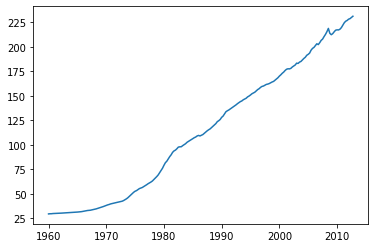

In [59]:
plt.plot(df["CPI"])
plt.show()

Cette série a une tendance dont la forme est proche d'une fonction linéaire.

On entraîne un modèle de régression linéaire OLS. En prenant les résidus du modèle, on obtient la série CPI stationnarisée:

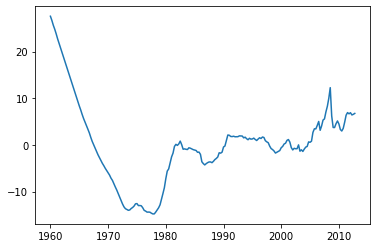

In [60]:
n = len(df["CPI"])
const = np.ones(n)
t = np.arange(1,n+1)
X = np.column_stack((const, t))
y = df["CPI"]
model = sm.OLS(y, X)
model = model.fit()
cpi_statio_1 = model.resid
plt.plot(cpi_statio_1)
plt.show()

La courbe évolue bien désormais autour de l'axe des abscisses (avec tout de même toujours un écart entre les années 60 et 70); elle a perdu sa tendance temporelle.

## Question 3

> Stationnariser la série de CPI en utilisant un moyenne mobile centrée 5x5.

On calcule la moyenne mobile centrée d'ordre 5, que l'on soustrait à la série CPI, pour la stationnariser:

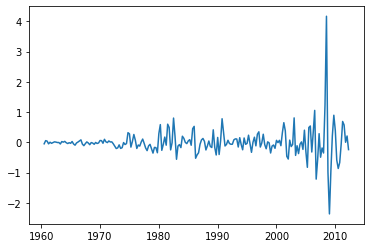

In [61]:
cpi_moving_average_2 = df["CPI"].rolling(window=5, center=True).mean()
cpi_statio_2 = df["CPI"] - cpi_moving_average_2
plt.plot(cpi_statio_2)
plt.show()

La courbe a une évolution plus stable qu'avec la méthode de stationnarisation précédente, et une amplitude plus faible. Cette méthode de stationnarisation est meilleure.

## Question 4

> Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

Le taux d'inflation est calculé de la façon suivante à partir de l'IPC:
    
$$
f_{inflation}(t) = \frac{f_{ICP}(t) - f_{ICP}(t-1)}{f_{ICP}(t-1)}
$$

In [62]:
df["inf"] = (df["CPI"] - df["CPI"].shift(1))/df["CPI"].shift(1)
df = df.iloc[1:]
#df.index = df.index.to_period('D') # On précise la fréquence explicitement (pour certaines fonctions de statsmodels)

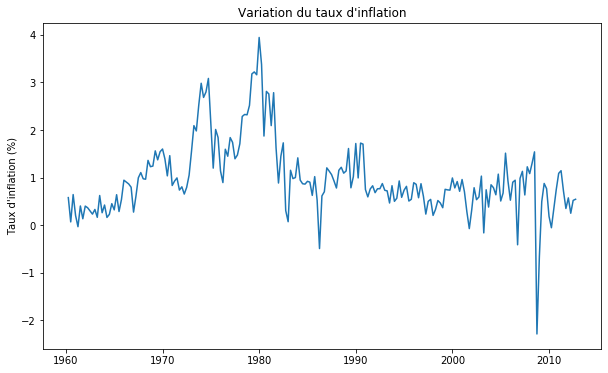

In [63]:
plt.figure(figsize=(10,6))
plt.plot(df["inf"]*100)
plt.title("Variation du taux d'inflation")
plt.ylabel("Taux d'inflation (%)")
plt.show()

Le taux d'inflation a beaucoup varié avec le temps. On constate une forte variation entre les années 70 et 80 et aux alentours de 2008. Ceci s'explique par la crise pétrolière des années 70 et la crise de 2007.

## Question 5

> Interpréter l'autocorrélogramme et l'autocorrélogramme partiel de inf. Quelle est la différence entre ces deux graphiques

On trace l'autocorrélogramme et l'autocorrélogramme partiel de inf.

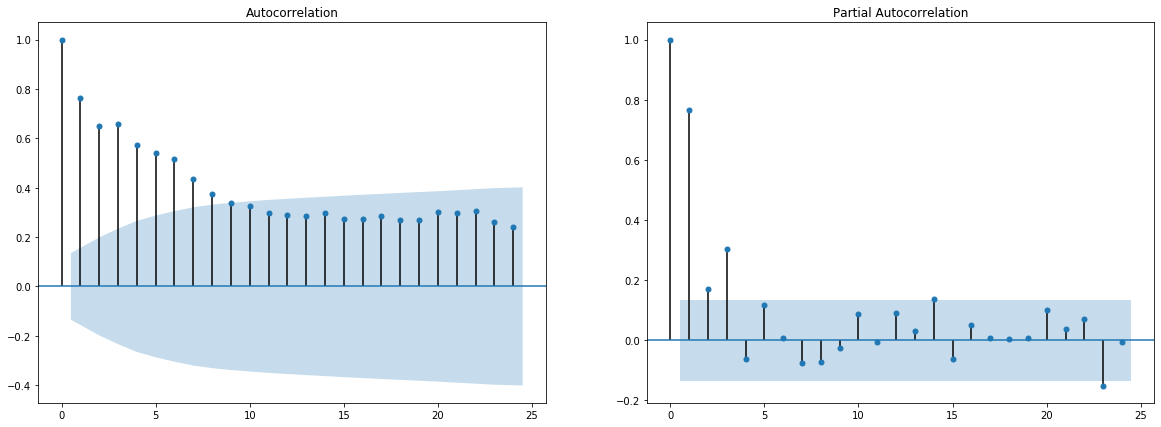

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

fig = plot_acf(df["inf"], ax=axes[0]) 
fig = plot_pacf(df["inf"], ax=axes[1])

L'**autocorrélation** d'un signal stationnaire (ici le taux d'inflation). Il résulte de la corrélation du signal par lui-même. Il montre la corrélation des observations entre elles, pour un décalage donné en abscisse.
On voit ici que l'autocorrélation est forte entre des observations proches et diminue lorsque les observations sont éloignées.

L'**autocorrélation partielle** est la corrélation entre des observations deux à deux d'un signal stationnaire, avec les observations intermédiaires retirées, pour ne pas influencer le comportement de ces deux observations entre elles.

## Question 6

> Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".

La **stationnarité** désigne le fait qu'une série temporelle garde la même structure à travers le temps.


L'**ergodicité** désigne le fait que les moyennes temporelles sont identiques aux moyennes statistiques, ce qui permet de connaître entièrement la statistique à partir d'une seule réalisation.

Nous avons besoin de ces deux conditions pour s'assurer que l'analyse de dépendance entre la série temporelle et une variable explicative ne soit pas bruitée par une composante temporelle.

Le terme **spurious regression** désigne le fait que des variables soient corrélées, mais sans qu'il existe de lien de cause à effet entre les deux.

## Question 7

> Faire le test Augmented Dickey Fuller pour inf en utilisant le critère AIC pour déterminer le nombre de lags à inclure. Commenter

Le test de Dickey-Fuller augmenté peut être utilisé pour tester une racine unitaire dans un processus univarié en présence d'une corrélation en série.

On utilise la fonction `adfuller` de `statsmodels` pour réaliser ce test, avec autolag="AIC" pour laisser l'algorithme déterminer le nombre de lags à inclure.

In [65]:
adf_inf_aic = adfuller(df["inf"], autolag="AIC")
print(adf_inf_aic)

(-2.9190558143371637, 0.04317651687155481, 2, 208, {'1%': -3.4621857592784546, '5%': -2.875537986778846, '10%': -2.574231080806213}, -1519.2580655612676)


Nous obtenons le résultat suivant:
    - Nombre de lags utilisés: 2
    - Statistique de test, adf = -2.92
    - p-value = 0.043
    - Nombre d'observations utilisées = 2018
    - Valeurs critiques pour le test statistique, à hauteur de:
        - 1% : -3.46
        - 5% : -2.88
        - 10% : - 2.57

## Question 8

> Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

On définit un modèle autorégressif AR, avec un lag allant de 1 à 20, pour sélectionner le meilleur. On teste le modèle selon le critère AIC et BIC, pour disposer de deux référenciels:

/home/xavier/.local/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning

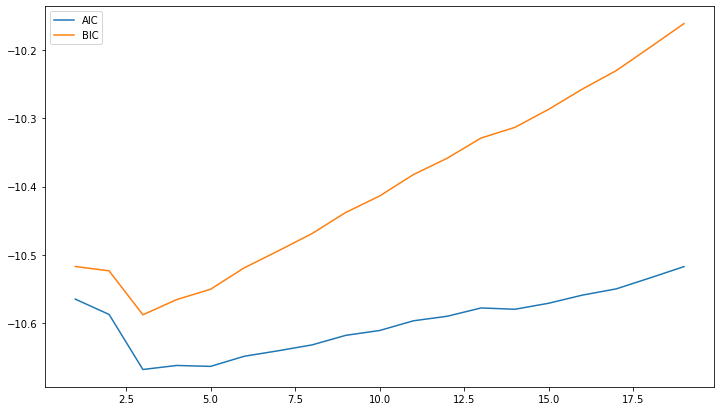

Lag optimal selon le critère BIC: 3
Lag optimal selon le critère AIC: 3


In [66]:
AIC = []
BIC = []

for lag in range(1, 20):
    ar_model = smt.AR(df["inf"], freq=df.index.inferred_freq).fit(maxlag=lag)
    
    AIC.append(ar_model.aic)
    BIC.append(ar_model.bic)

plt.figure(figsize=(12, 7))
plt.plot(range(1, 20), AIC, label="AIC")
plt.plot(range(1, 20), BIC, label='BIC')
plt.legend()
plt.show()

print("Lag optimal selon le critère BIC: {:d}".format(np.argmin(BIC) + 1))
print("Lag optimal selon le critère AIC: {:d}".format(np.argmin(AIC) + 1))

Le critère AIC est minimisé pour une valeur de **p valant 3**.

## Question 9

> Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.

On estime la courbe avec une régression linéaire, qui semble être le modèle le plus proche de la répartition des données.

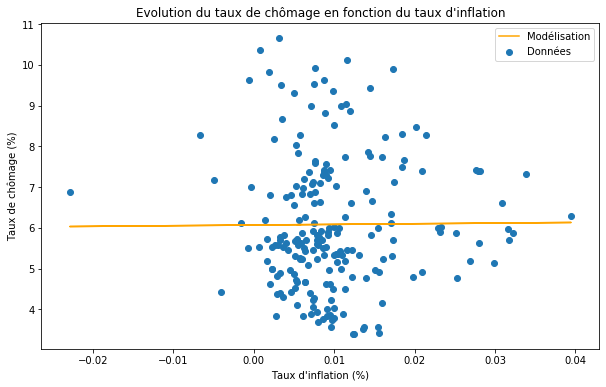

In [67]:
X = df["inf"]
y = df["Unemp"]

model = sm.OLS(y, sm.add_constant(X)) # On ajoute une constante à l'inflation, avec add_constant()
model = model.fit()
y_plot = model.predict(sm.add_constant(X))

plt.figure(figsize=(10,6))
plt.plot(X, y_plot, color="orange", label="Modélisation")
plt.scatter(X, y, label="Données")
plt.xlabel("Taux d'inflation (%)")
plt.ylabel("Taux de chômage (%)")
plt.title("Evolution du taux de chômage en fonction du taux d'inflation")
plt.legend()
plt.show()

## Question 10

> Tester l’autocorrélation des erreurs.

On affiche la répartition des erreurs:

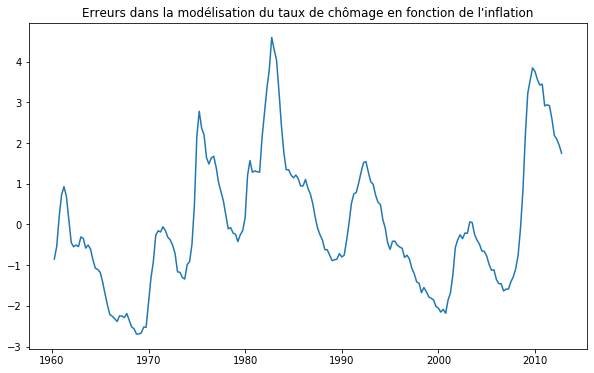

In [68]:
errors = model.resid
plt.figure(figsize=(10,6))
plt.plot(errors)
plt.title("Erreurs dans la modélisation du taux de chômage en fonction de l'inflation")
plt.show()

On affiche l'autocorrélogramme et l'autocorrélogramme partiel:

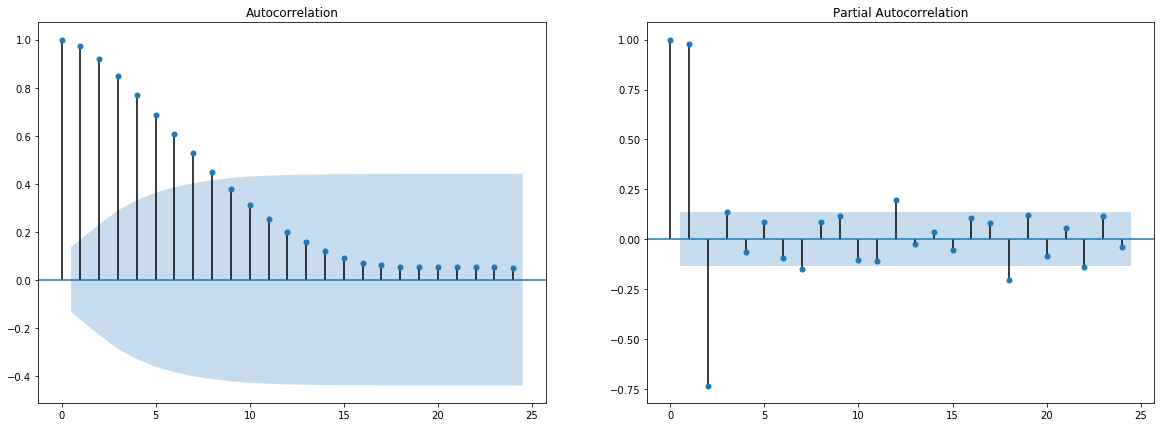

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

fig = plot_acf(errors, ax=axes[0]) 
fig = plot_pacf(errors, ax=axes[1])

La courbe de l'autocorrélation est positive et élevée lorsque les valeurs sont proches. Les erreurs sont donc autocorrélées.

## Question 11

> Corriger l’autocorrélation des erreurs par la méthode vue en cours.

In [70]:
# On calcule à l'aide d'un modèle, le coefficient linéaire de corrélation entre erreurs
y = errors.values[1:]
X = errors.shift(1)[1:].values

model = sm.OLS(y, X).fit()
coef = model.params[0]
print(coef)

0.9799237799707919


In [71]:
# On modifie le taux de chômage et l'inflation à partir de ce coefficient
df["inf_corr"] = np.zeros(df.shape[0]) 
df["Unemp_corr"] = np.zeros(df.shape[0]) 

df["inf_corr"].iloc[0] = np.sqrt(1 - coef**2) * df["inf"].iloc[0]
df["Unemp_corr"].iloc[0] = np.sqrt(1 - coef**2) * df["Unemp"].iloc[0]
for i in range(1, len(df["Unemp"])):
    df["Unemp_corr"].iloc[i] = df["Unemp"].iloc[i] - coef * df["Unemp"].iloc[i-1]
    df["inf_corr"].iloc[i] = df["inf"].iloc[i] - coef * df["inf"].iloc[i-1]

    
# On recalcule le taux de chômage en fonction du taux d'inflation, puis on extrait les résidus du modèle
model_correction = sm.OLS(df["Unemp_corr"], sm.add_constant(df["inf_corr"])).fit()
errors_correction = model_correction.resid

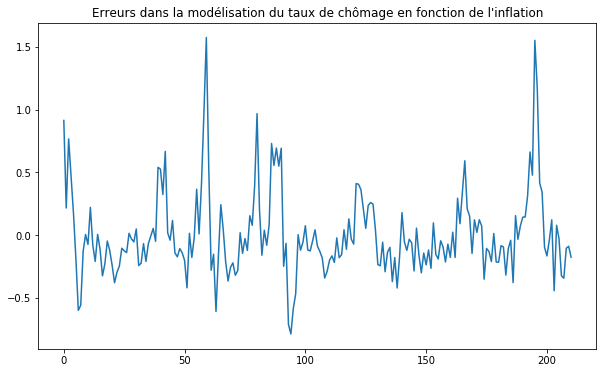

In [72]:
plt.figure(figsize=(10,6))
plt.plot(list(errors_correction))
plt.title("Erreurs dans la modélisation du taux de chômage en fonction de l'inflation")
plt.show()

Les erreurs sont plus faibles et davantage réparties.

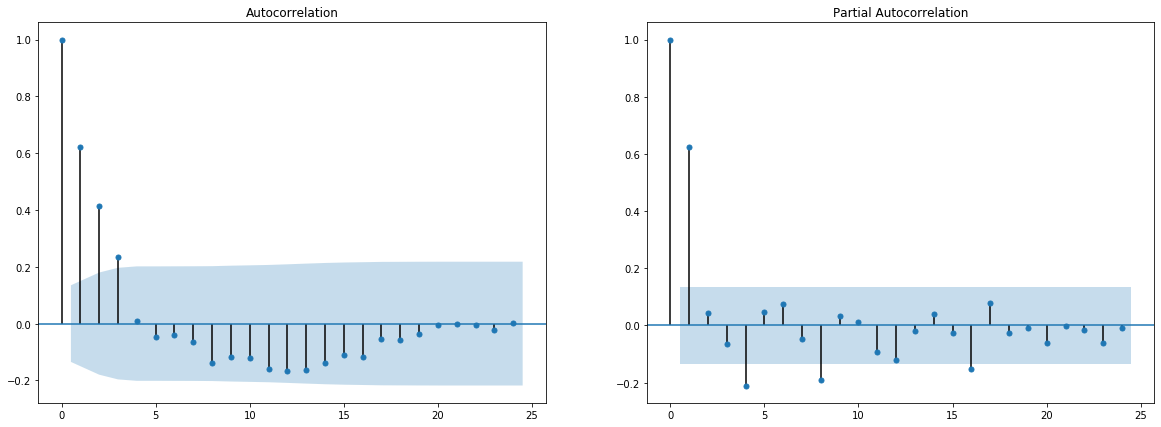

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

fig = plot_acf(errors_correction, ax=axes[0]) 
fig = plot_pacf(errors_correction, ax=axes[1])

L'autocorrélation des erreurs a été en grande partie diminuée. On gardera ces variables pour la suite.

## Question 12

> Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

On prend deux sous-périodes de taille 100:

In [74]:
X = list(df["inf_corr"])[:200]
X_all = sm.add_constant(X)
y_all = df["Unemp_corr"][:200]

X = list(df["inf_corr"])[:100]
X1 = sm.add_constant(X)
y1 = df["Unemp_corr"][:100]

X = list(df["inf_corr"])[100:200]
X2 = sm.add_constant(X)
y2 = df["Unemp_corr"][100:200]

On affiche les statistiques descriptives de la relation chômage-inflation sur ces deux sous-périodes:

In [75]:
model = sm.OLS(y1, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Unemp_corr   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     10.11
Date:                Sat, 11 Apr 2020   Prob (F-statistic):            0.00197
Time:                        15:19:53   Log-Likelihood:                -44.813
No. Observations:                 100   AIC:                             93.63
Df Residuals:                      98   BIC:                             98.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1593      0.038      4.154      0.0

In [76]:
model = sm.OLS(y2, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Unemp_corr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.006524
Date:                Sat, 11 Apr 2020   Prob (F-statistic):              0.936
Time:                        15:19:53   Log-Likelihood:                -17.174
No. Observations:                 100   AIC:                             38.35
Df Residuals:                      98   BIC:                             43.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1418      0.029      4.885      0.0

Les statistiques varient entre les deux modèles, notamment le coefficient, la variance et t.

On va maintenant réaliser un test de Chow pour tester la stabilité de la relation. Pour cela on commence par calculer la sommes des carrés des erreurs de plusieurs modèles:

In [77]:
# Modèle non contraint
model = sm.OLS(y_all, X_all).fit()
u = model.resid
SSR_all = u.T @ u
size_all = len(X_all) - 2

# Modèle contraint (première sous-période)
model = sm.OLS(y1, X1).fit()
u = model.resid
SSR1 = u.T @ u
size1 = len(X1) - 2

# Modèle contraint (deuxième sous-période)
model = sm.OLS(y2, X2).fit()
u = model.resid
SSR2 = u.T @ u
size2 = len(X2) - 2

On calcule la p-valeur avec la statistique de Fischer:

In [78]:
F = ((SSR_all - (SSR1 + SSR2)) / (size_all - (size1 + size2))) / ((SSR1 + SSR2) / (size1 + size2))
p_val = f.sf(F, size_all - (size1 + size2), (size1 + size2))

print("Statistique de test : {:0.5f}".format(F))
print("p-valeur            : {:0.5f}".format(p_val))

Statistique de test : 4.03891
p-valeur            : 0.01910


La p-valeur est de 1,9%, ce qui est inférieur à 5%.<br />
On rejette donc l'hypothèse de stabilité entre les 2 sous-périodes, à hauteur de 5%.

## Question 13

> Faites les tests changement de structure de Chow et détecter le point de rupture.

Pour détecter le point de rupture, nous allons calculer la statistique de test et la p-valeur en chaque point. On commence par créer une fonction contenant le calcul du test de Chow, comme au dessus:

In [79]:
from scipy import stats

def chow_calculation(current_date):
    # Modèle non contraint
    X = list(df["inf_corr"])
    X_all = sm.add_constant(X)
    y_all = df["Unemp_corr"]
    model = sm.OLS(y_all, X_all).fit()
    u = model.resid
    SSR_all = np.sum(model.resid ** 2) #u.T @ u
    size_all = len(X_all) - 2

    # Modèle contraint (première sous-période)
    X = list(df["inf_corr"])[:current_date]
    y = df["Unemp_corr"][:current_date]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    u = model.resid
    SSR1 = np.sum(model.resid ** 2) #u.T @ u
    size1 = len(X) - 2

    # Modèle contraint (deuxième sous-période)
    X = list(df["inf_corr"])[current_date:]
    y = df["Unemp_corr"][current_date:]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    u = model.resid
    SSR2 = np.sum(model.resid ** 2) #u.T @ u
    size2 = len(X) - 2

    F = ((SSR_all - (SSR1 + SSR2)) / (size_all - (size1 + size2))) / ((SSR1 + SSR2) / (size1 + size2))
    p_val = f.sf(F, size_all - (size1 + size2), (size1 + size2))
    return F, p_val

In [80]:
Fs = []
p_values = []

# On parcourt nos valeurs avec un taux de trim de 10% aux extrémités
for i in range(int(0.1*df.shape[0]), int(0.9*df.shape[0])):
    f_value, p_val = chow_calculation(i) 
    Fs.append(f_value)
    p_values.append(p_val)

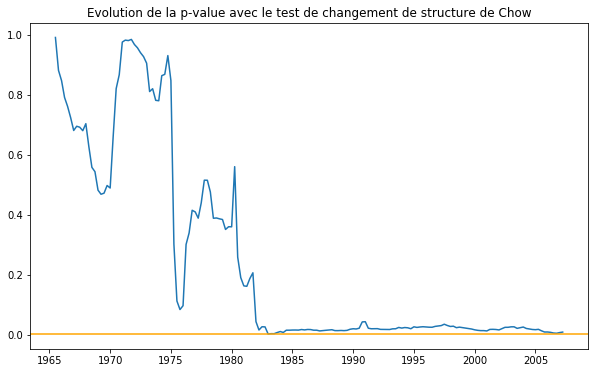

In [81]:
plt.figure(figsize=(10,6))
plt.plot(df.index[int(0.1*df.shape[0]): int(0.9*df.shape[0])], p_values)
plt.axhline(min(p_values), color="orange")
plt.title("Evolution de la p-value avec le test de changement de structure de Chow")
plt.show()

Il y a un point de rupture en 1982. Avant cette date, la relation chômage - inflation variait beaucoup. Cette période était marquée par plusieurs chocs pétroliers. La relation est ensuite devenue beaucoup plus stable.<br />
La courbe orange montre la valeur minimale prise par la p-value.

## Question 14

> Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

On crée un tableau contenant les variables explicatives, avec les délais d'ordre 1, 2, 3 et 4 de l’inflation et du chômage:

In [82]:
inf_delays = []

for i in range(5, df.shape[0]) :
    inf_delays.append([df["inf"].iloc[i-1], df["inf"].iloc[i-2], df["inf"].iloc[i-3], df["inf"].iloc[i-4],
                      df["Unemp"].iloc[i-1], df["Unemp"].iloc[i-2], df["Unemp"].iloc[i-3], df["Unemp"].iloc[i-4]])

On calcule un modèle pour estimer la courbe de Granger, puis on affiche ses caractéristiques:

In [83]:
X = sm.add_constant(inf_delays)
model = sm.OLS(df["Unemp"].iloc[5:], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1137.
Date:                Sat, 11 Apr 2020   Prob (F-statistic):          2.20e-160
Time:                        15:19:54   Log-Likelihood:                 4.1298
No. Observations:                 206   AIC:                             9.740
Df Residuals:                     197   BIC:                             39.69
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1459      0.073      2.010      0.0

Les variables les plus influentes sont l'**inflation** et partiulièrement au temps t-4 (variable x4), t-3 (x3) et t-1 (x2) et le taux de **chômage** au temps t-1.

On réalise le test de Granger de non causalité de l’inflation sur le chômage. On choisit un délai maximum d'ordre 4.<br />
On pose l'hypothèse nulle suivante: l'inflation n'influe pas sur le chômage.

In [84]:
grangercausalitytests(df[["Unemp", "inf"]], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.9875  , p=0.0031  , df_denom=207, df_num=1
ssr based chi2 test:   chi2=9.1177  , p=0.0025  , df=1
likelihood ratio test: chi2=8.9254  , p=0.0028  , df=1
parameter F test:         F=8.9875  , p=0.0031  , df_denom=207, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3146  , p=0.0146  , df_denom=204, df_num=2
ssr based chi2 test:   chi2=8.8406  , p=0.0120  , df=2
likelihood ratio test: chi2=8.6587  , p=0.0132  , df=2
parameter F test:         F=4.3146  , p=0.0146  , df_denom=204, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.0265  , p=0.0022  , df_denom=201, df_num=3
ssr based chi2 test:   chi2=15.6045 , p=0.0014  , df=3
likelihood ratio test: chi2=15.0469 , p=0.0018  , df=3
parameter F test:         F=5.0265  , p=0.0022  , df_denom=201, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7967  , p=0.0054  

{1: ({'ssr_ftest': (8.987485356629929, 0.003051032077893228, 207.0, 1),
   'ssr_chi2test': (9.11773876759558, 0.002531426762760379, 1),
   'lrtest': (8.925351661078764, 0.0028123920255045997, 1),
   'params_ftest': (8.987485356629769, 0.003051032077893474, 207.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.3145560925458835, 0.014613661475363427, 204.0, 2),
   'ssr_chi2test': (8.840610032765586, 0.012030562206468053, 2),
   'lrtest': (8.658743924413557, 0.013175819804938838, 2),
   'params_ftest': (4.3145560925458, 0.014613661475364553, 204.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.026452610565885, 0.0022168908875367663, 201.0, 3),
   'ssr_chi2test': (15.604509596980659, 0.0013665815172325647, 3),
   'lrtest': (15.046892540195813, 0.0017770113729011327, 3),
   'params_ftest': (5.026452610565934, 0.0022168908875366475, 201.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
      

Le test de Granger permet de déterminer si une variable (la deuxième passée en paramètre) a un effet statistique sur une autre (la première passée en paramètre). Ceci est indiqué par les p-values. 

Les p-values sont données pour les 4 lags et pour plusieurs statistiques de tests. La p-valeur est 0.0054 pour un nombre de lags de 4 avec la statistique F test. La p-valeur pour les différents lags est entre 0.1 et 0.6 pour les différentes statistiques de tests.<br />
La p-valeur étant **en dessous de 5%**, on rejette l'hypothèse que l'inflation n'a pas d'effet statistique sur le chômage. 

## Question 15

> Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.

On considère un modèle équivalent, de la forme:

$ y_t = \alpha_0 + \delta_0z_t + \delta_1z_{t-1} + \delta_2z_{t-2} + \delta_3z_{t-3} + ... $

On recalcule ce modèle en prenant l'inflation du temps t au temps t-4:

In [85]:
inf_delays = []

for i in range(5, df.shape[0]) :
    inf_delays.append([100*df["inf"].iloc[i], 100*df["inf"].iloc[i-1], 100*df["inf"].iloc[i-2], 100*df["inf"].iloc[i-3], 100*df["inf"].iloc[i-4]])

In [86]:
X = sm.add_constant(inf_delays)
model = sm.OLS(df["Unemp"].iloc[5:], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     4.624
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           0.000514
Time:                        15:19:54   Log-Likelihood:                -381.54
No. Observations:                 206   AIC:                             775.1
Df Residuals:                     200   BIC:                             795.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7311      0.196     29.259      0.0

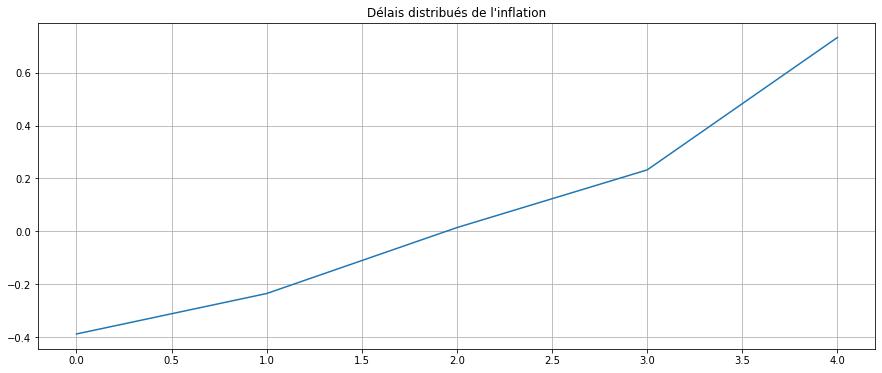

In [87]:
plt.figure(figsize=(15,6))
plt.plot(model.params[1:].values)
plt.title("Délais distribués de l'inflation")
plt.grid()
plt.show()

Les délais distribués montrent que l'inflation a un impact à long terme sur le chômage plutôt qu'à court terme (coefficient supérieur à 0 à partir d'un lag de 2).

L'impact à long terme est la somme des coefficients des variables explicatives (privé de la variable constante):

$ LRP = \delta_0 + \delta_1 + \delta_2 + \delta_3 + ... $

In [88]:
# 0,35
print(model.params[1:].sum())

0.35627341721514383
